# 4. přednáška - Grafika

## Příklad 1
V tabulce jsou uvedeny průměrné měsíční teploty v Brně v roce 2016 a dlouholeté minimální a maximální měsíční průměry

 | | I | II | III | IV | V | VI | VII | VIII | IX | X | XI | XII |
 |:-|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
 | *průměrné* | -2,1 | -0,3 | 4,4 | 9,5 | 14,3 | 17,5 | 19,3 | 19,1 | 14,8 | 9,3 | 4,0 | -0,4 |
 | *minimální* | -10,8 | -8,4 | -0,6 | 6,4 | 10,6 | 14,5 | 16,3 | 15,1 | 11,3 | 5,6 | 0,1 | -5,1 |
 | *maximální* | 3,0 | 4,9 | 8,8 | 14,0 | 17,2 | 20,9 | 22,9 | 24,0 | 18,1 | 12,5 | 7,5 | 2,8 |

Zdroj: ČHMÚ

<div class="alert alert-block alert-success"> 

Nejprve načteme data ze souboru **teploty.mat**.
    
</div>

In [39]:
library(R.matlab)
x <- readMat('teploty.mat')


<div class="alert alert-block alert-danger"> 

K načtení matlabovského datového souboru potřebujeme knihovnu *R.matlab*. Ta se nainstaluje příkazem **install.packages** a poté načte příkazem **library**.
    
</div>

In [40]:
load("teploty.RData", verbose = TRUE)

Loading objects:
  x


In [41]:
prumerne_teploty <- x$prumerne.teploty
min_teploty <- x$min.teploty
max_teploty <- x$max.teploty
mesice <- c("Leden", "Únor", "Březen", "Duben", "Květen", "Červen",
            "Červenec", "Srpen", "Září", "Říjen", "Listopad", "Prosinec")


<div class="alert alert-block alert-success"> 

**1.** Jak vykreslit průběh teplot v čase?
    
</div>

<div class="alert alert-block alert-info"> 

Existuje několik možností. Uvedeme postupně jednotlivé.
    
</div>

<div class="alert alert-block alert-warning"> 

Základní grafika
    
</div>

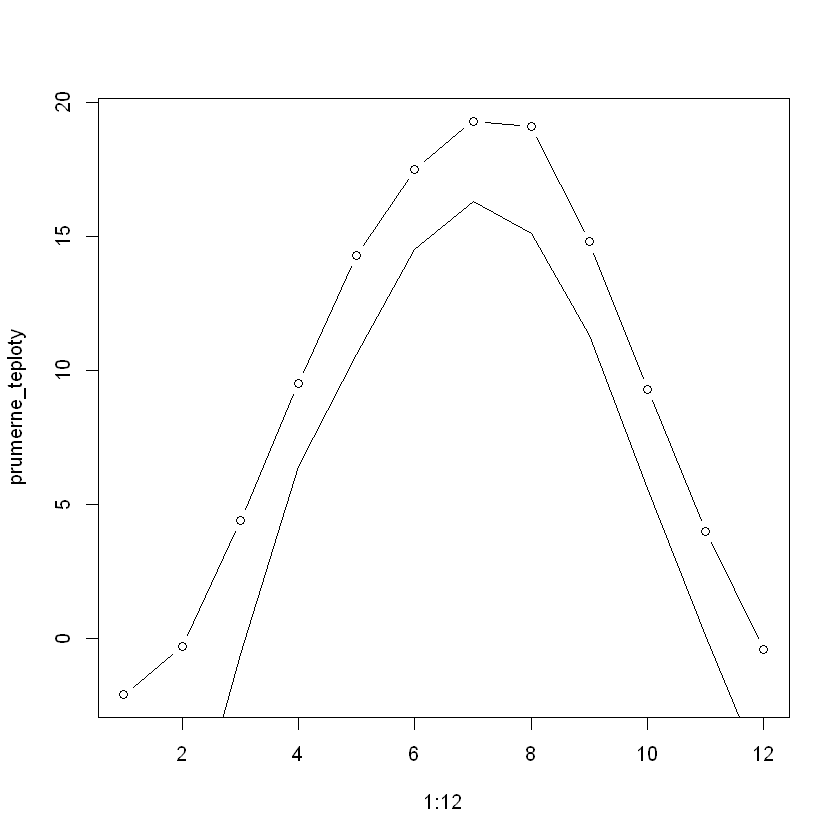

In [42]:
# prvni pokus

plot(1:12, prumerne_teploty, type = "b")
lines(1:12, min_teploty) # ..... blba cesta....

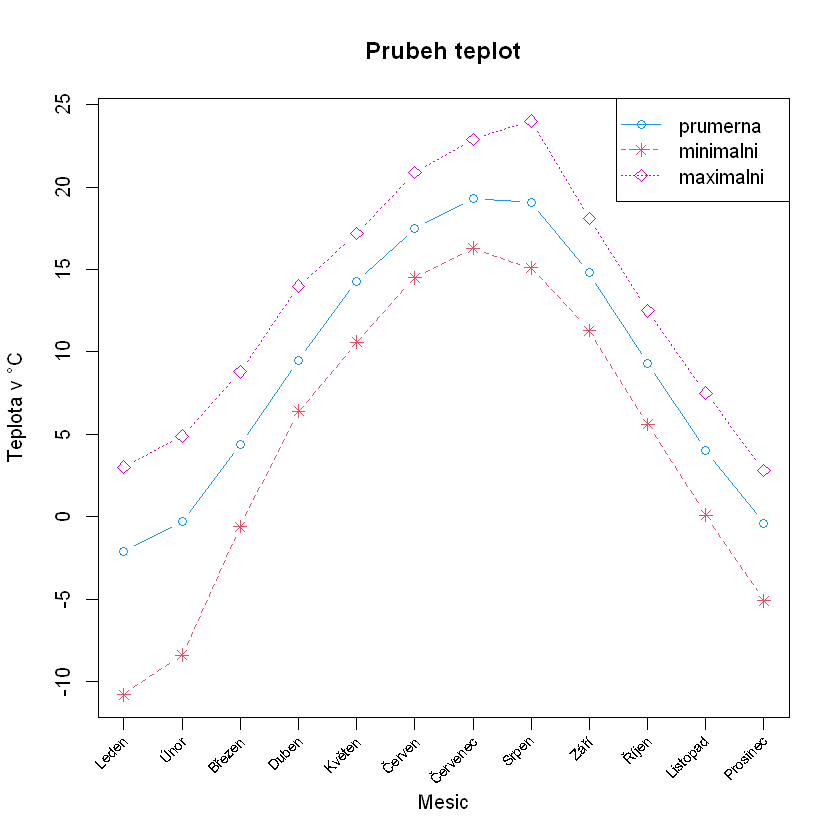

In [43]:
# lepsi
matice <- rbind(prumerne_teploty, min_teploty, max_teploty)
matplot(1:12, t(matice), type = "b", pch = c(1, 8, 5), col = c(4,2,6),
        xlab = "Mesic", ylab = "Teplota v °C", xaxt = "n", 
        main = "Prubeh teplot")
axis(side = 1, at = 1:12, labels = FALSE)

text(1:12, par("usr")[3]-1.25, srt = 45, adj= 1, xpd = TRUE,
     labels = mesice, cex = 0.7)

legend("topright", c("prumerna", "minimalni", "maximalni"), col = c(4,2,6),
       lty = c(1, 2, 3), pch = c(1, 8, 5))


<div class="alert alert-block alert-warning"> 

Knihovna **ggplot2**
    
</div>

In [44]:
# nacteni knihovny
library(ggplot2)

In [45]:
# vytvoreni datove tabulky
df <- data.frame(cas = rep(1:12, times = 3), 
                 hodnoty = c(prumerne_teploty, min_teploty, max_teploty),
                 indik = factor(rep(c("prum","minim","maxim"), each = 12)))

In [46]:
# definice barev
barvy <- c("#FFBF00", "#E52B50", "#5D8AA8")

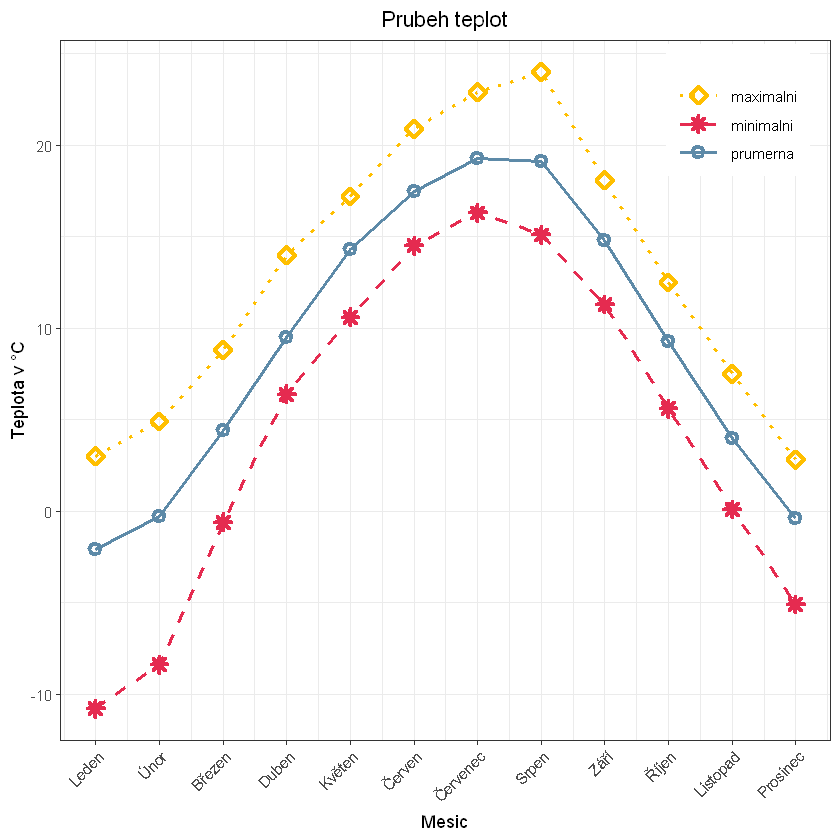

In [47]:

p0 <- ggplot(df, aes(x = cas, y = hodnoty, colour = indik, shape = indik, linetype = indik))
p0 <- p0 + geom_line(size = 1)
p0 <- p0 + geom_point(stroke = 2, size = 2, show.legend = T)
p0 <- p0 + scale_shape_manual(values = c(5, 8, 1), name  = "", 
                              labels = c("maximalni", "minimalni", "prumerna"))
p0 <- p0 + scale_linetype_manual(values = c(3, 2, 1), name  = "", 
                                 labels = c("maximalni", "minimalni", "prumerna"))
p0 <- p0 + scale_colour_manual(values = barvy, name  = "", 
                               labels = c("maximalni", "minimalni", "prumerna"))
p0 <- p0 + theme_bw () + xlab("Mesic") + ylab("Teplota v °C") + ggtitle("Prubeh teplot")
p0 <- p0 + theme(plot.title = element_text(hjust = 0.5))
p0 <- p0 + scale_x_continuous(breaks = 1:12, labels = mesice)
p0 <- p0 + theme(axis.text.x = element_text(angle = 45, hjust = 1))
p0 <- p0 + theme(legend.position = c(0.88, .9), legend.key.width = unit(10, "mm"))

print (p0)

<div class="alert alert-block alert-success"> 

**2.** Jak exportovat obrázky do PDF, abychom je mohli vložit do této prezentace?
    
</div>

<div class="alert alert-block alert-info"> 

Export obrázku lze přímo z prostředí Jupyter kliknutím na ikonu "Save As" vpravo nahoře. Exportovat příkazem je výhodné, pokud chceme exportovat více obrázků.
    
</div>

png 
  2

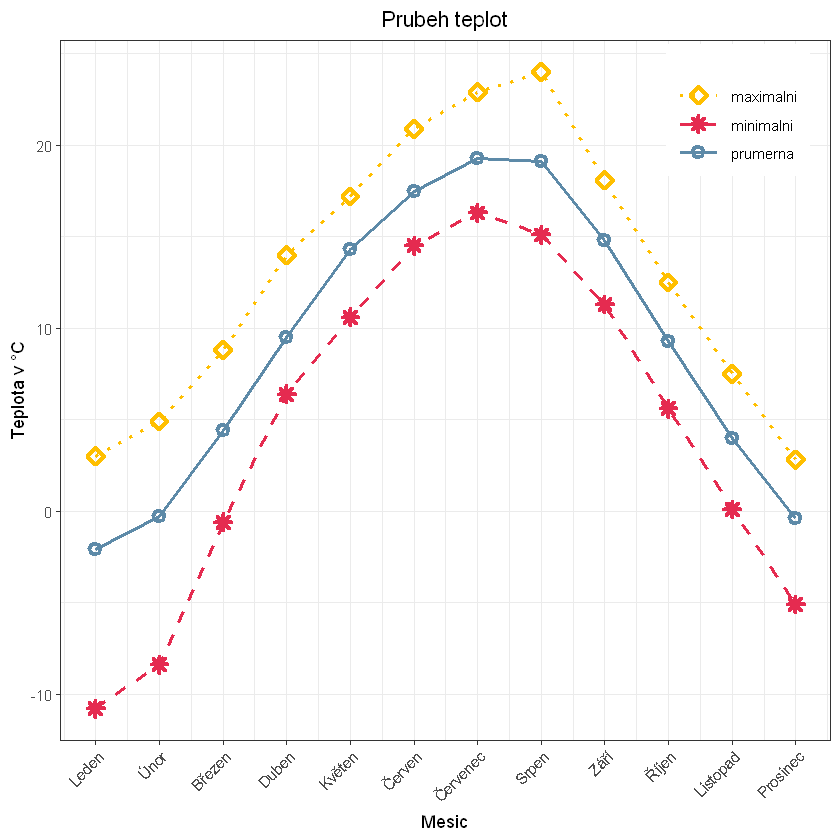

In [48]:
print(p0)
dev.copy2pdf (file = "pokus.pdf", width = 12, height = 9, pagecentre = TRUE)  

<div class="alert alert-block alert-success"> 

**3.** Jak vykreslit průběh teplot v čase s odchylkami od extrémních hodnot?
    
</div>

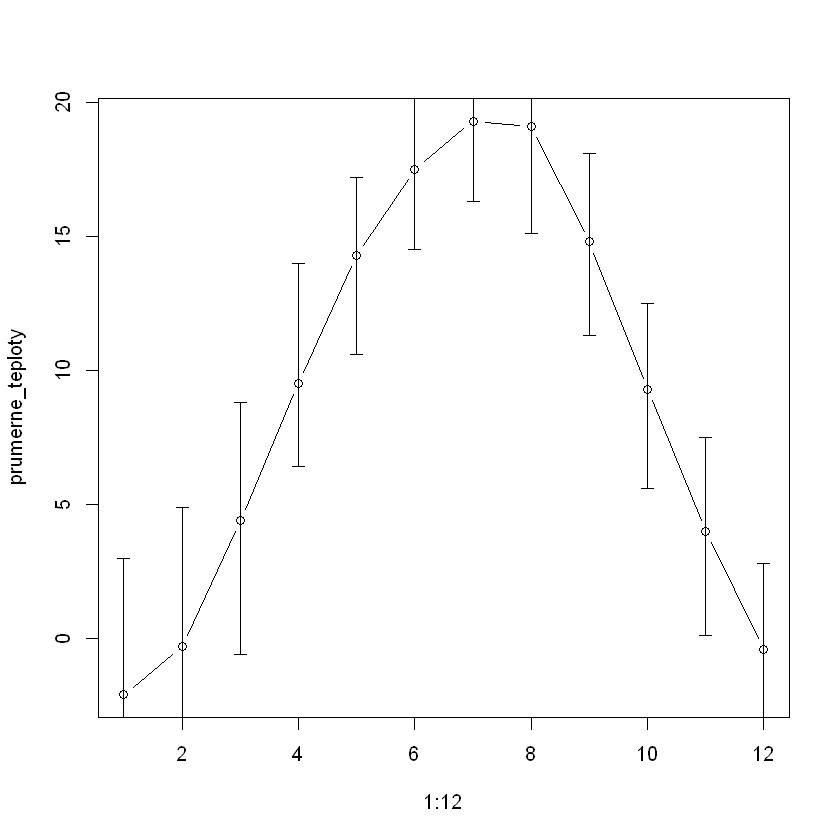

In [49]:
plot(1:12, prumerne_teploty, type = "b")
arrows(1:12, min_teploty, 1:12, max_teploty, angle = 90, length = 0.05, code = 3)
# ne moc dobra cesta...

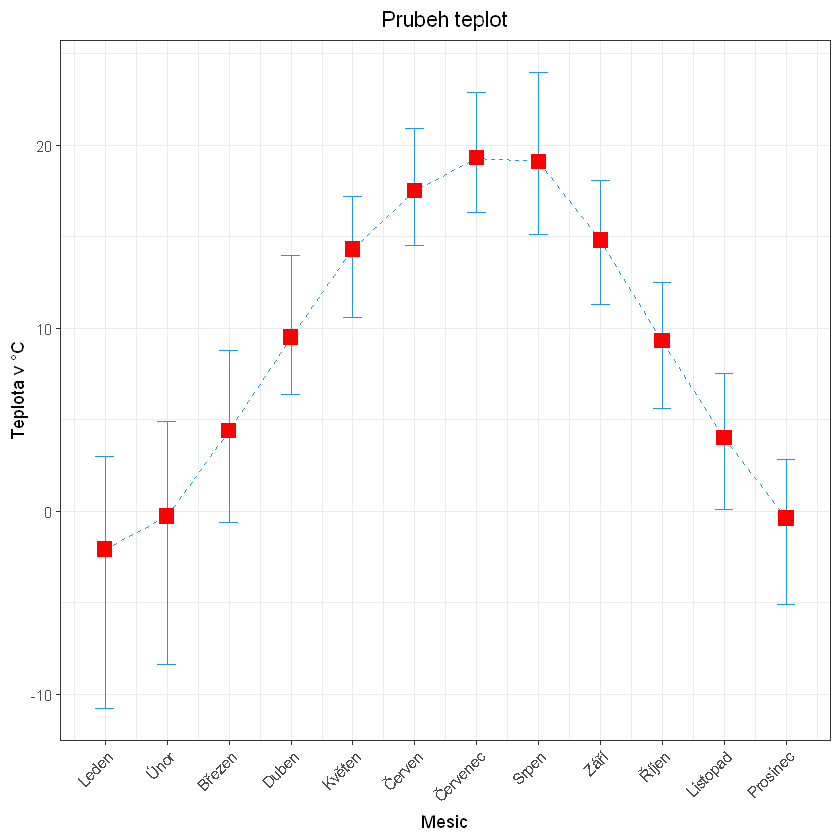

In [50]:
# ggplot
df <- data.frame(cas = 1:12, prum = t(prumerne_teploty), minim = t(min_teploty), 
                 maxim = t(max_teploty))

p1 <- ggplot(df, aes(x = cas, y = prum))
p1 <- p1 + geom_errorbar(aes(ymin = minim, ymax = maxim), colour = 4, width = 0.3)
p1 <- p1 + geom_line(linetype = 2, colour = 4)
p1 <- p1 + geom_point(shape = 15, colour= "red", size = 4)
p1 <- p1 + theme_bw () + xlab("Mesic") + ylab("Teplota v °C") + ggtitle("Prubeh teplot")
p1 <- p1 + theme(plot.title = element_text(hjust = 0.5))
p1 <- p1 + scale_x_continuous(breaks = 1:12, labels = mesice)
p1 <- p1 + theme(axis.text.x = element_text(angle = 45, hjust = 1))

print(p1)

## Příklad 2
V tabulce jsou uvedeny počty obyvatel v Jihomoravském kraji ve věku 15 a více let podle nejvyššího ukončeného vzdělání.
|rok | celkem | základní | vyučení | střední | vysokoškolské | bez vzdělání|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 1980 | 877 755 | 396 337 | 276 699 | 148 070 | 51 151 | 1 565|
| 1991 | 904 177 | 302 604 | 312 072 | 205 564 | 75 359 | 2 227|
| 2001 | 953 502 | 222 262 | 353 596 | 267 556 | 98 154 | 3 269|
| 2011 | 1 003 708 | 176 419 | 324 371 | 307 714 | 143 968 | 4 283|

Zdroj: ČSÚ

<div class="alert alert-block alert-success"> 

Nejprve načteme data ze souboru **obyvatelstvoJM.csv**.
    
</div>

In [51]:
df <- read.table('obyvatelstvoJM.csv', header = TRUE, sep = ";")

In [52]:
M <- as.matrix(df[,-1])
hodnoty <- c(t(M))
barvy <- 4:9
roky <- df$rok

<div class="alert alert-block alert-success"> 

**1.** Jak vykreslit sloupcový graf absolutních hodnot?
    
</div>

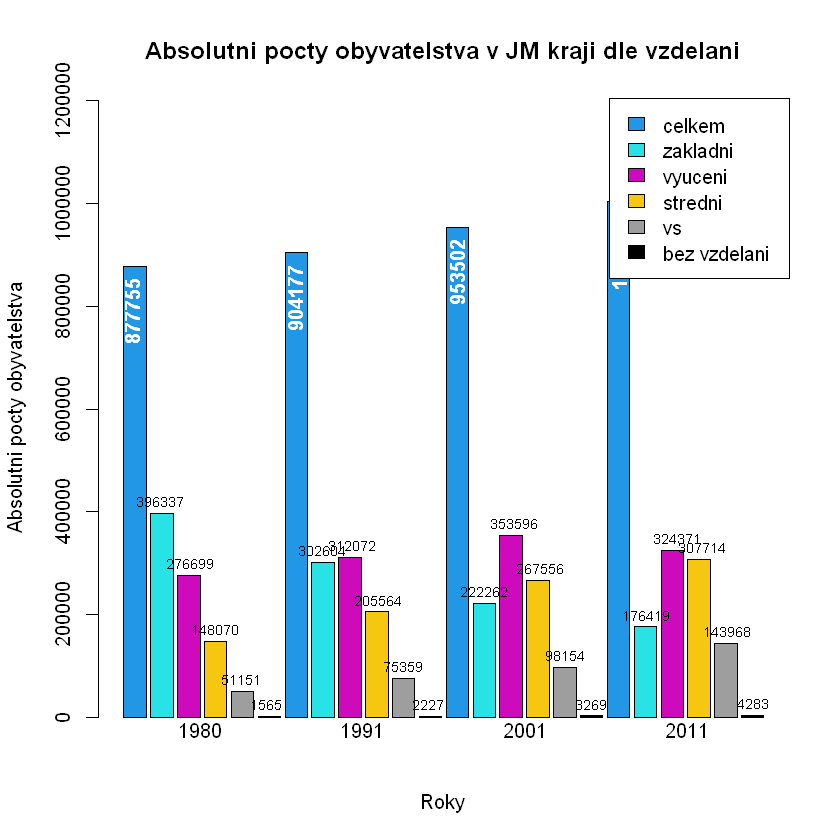

In [53]:
barplot(hodnoty , border = TRUE , col = rep(barvy, times = 4), ylim = c(0, max(df$celkem)*1.2),
        xlab = "Roky", ylab = "Absolutni pocty obyvatelstva", 
        main = "Absolutni pocty obyvatelstva v JM kraji dle vzdelani")

ixy <- (par("usr")[2] + par("usr")[1])/8
iyy <- (par("usr")[3] + par("usr")[4])/50
text(c(1,3,5,7)*ixy, par("usr")[3] - iyy, adj = 0.5, xpd = TRUE,
     labels = as.character(roky))
legend("topright", c("celkem", "zakladni", "vyuceni", "stredni", "vs", "bez vzdelani"), 
       fill = barvy)

text(c(1,3,5,7)*ixy - 3/4*ixy, df$celkem - iyy, srt = 90, adj = c(1,0), xpd = TRUE,
     labels = as.character(df$celkem), col = "white", font = 2)
text(c(1,3,5,7)*ixy - 2/4*ixy, df$zakladni + iyy, adj = 0.5,
     labels = as.character(df$zakladni), cex = 0.7)
text(c(1,3,5,7)*ixy - 1/8*ixy, df$vyuceni + iyy, adj = 0.5,
     labels = as.character(df$vyuceni), cex = 0.7)
text(c(1,3,5,7)*ixy + 3/16*ixy, df$stredni + iyy, adj = 0.5,
     labels = as.character(df$stredni), cex = 0.7)
text(c(1,3,5,7)*ixy + 2/4*ixy, df$vs + iyy, adj = 0.5,
     labels = as.character(df$vs), cex = 0.7)
text(c(1,3,5,7)*ixy + 13/16*ixy, df$bez + iyy, adj = 0.5,
     labels = as.character(df$bez), cex = 0.7)


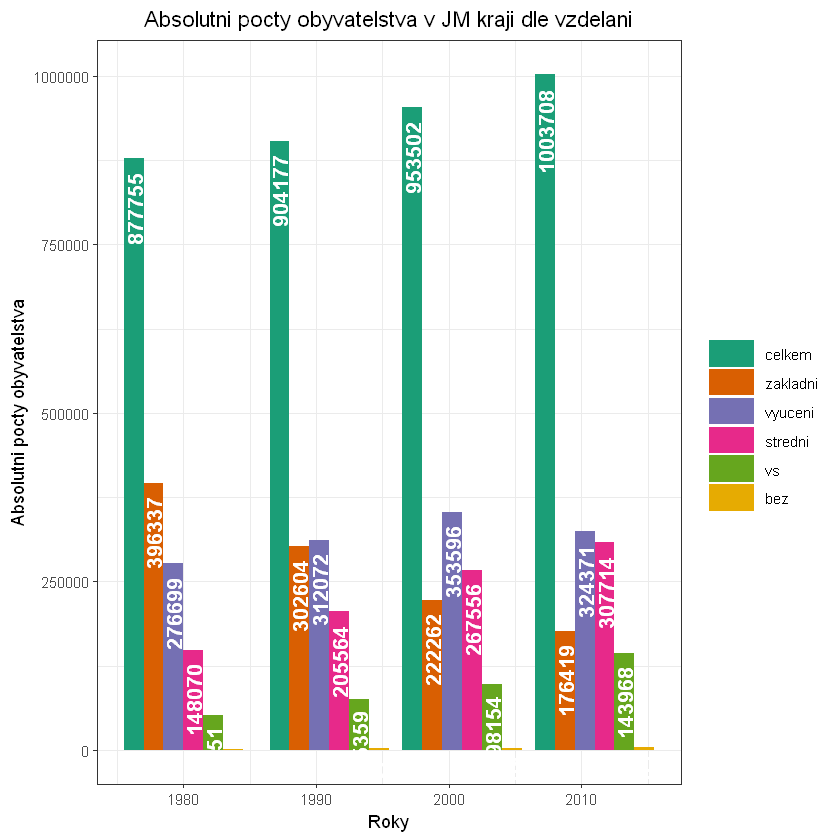

In [54]:
# ggplot
vzdelani <- factor(names(df)[-1], ordered = TRUE, levels = names(df)[-1])
dfg <- data.frame(pocet = c(t(M)), vzdelani = vzdelani, rok = rep(roky, each = 6))

p2 <- ggplot(data = dfg, 
             aes(x = rok, y = pocet, fill = vzdelani))
p2 <- p2 + geom_bar(stat = "identity", position = "dodge")
p2 <- p2 + theme_bw () + xlab("Roky") + ylab("Absolutni pocty obyvatelstva") + labs(fill = "") + 
  ggtitle("Absolutni pocty obyvatelstva v JM kraji dle vzdelani")
p2 <- p2 + theme(plot.title = element_text(hjust = 0.5))
p2 <- p2 + scale_fill_brewer(palette="Dark2")  # zmena barevne palety
p2 <- p2 + theme(legend.position.inside = c(0.92, 0.85), legend.key.width = unit(10, "mm"))
p2 <- p2 + geom_text(aes(label = pocet), vjust = 0.5, hjust = 1.2,  color = "white", angle = 90, 
                     position = position_dodge(width = 9), size = 4.5, fontface = "bold")
#nebo
# p2 <- p2 + geom_text(aes(label = pocet), vjust = - 0.5,  color = "black", 
#                      position = position_dodge(width = 9), size = 2.8)

print(p2)


<div class="alert alert-block alert-success"> 

**2.** Jak vykreslit sloupcový graf relativních hodnot?
    
</div>

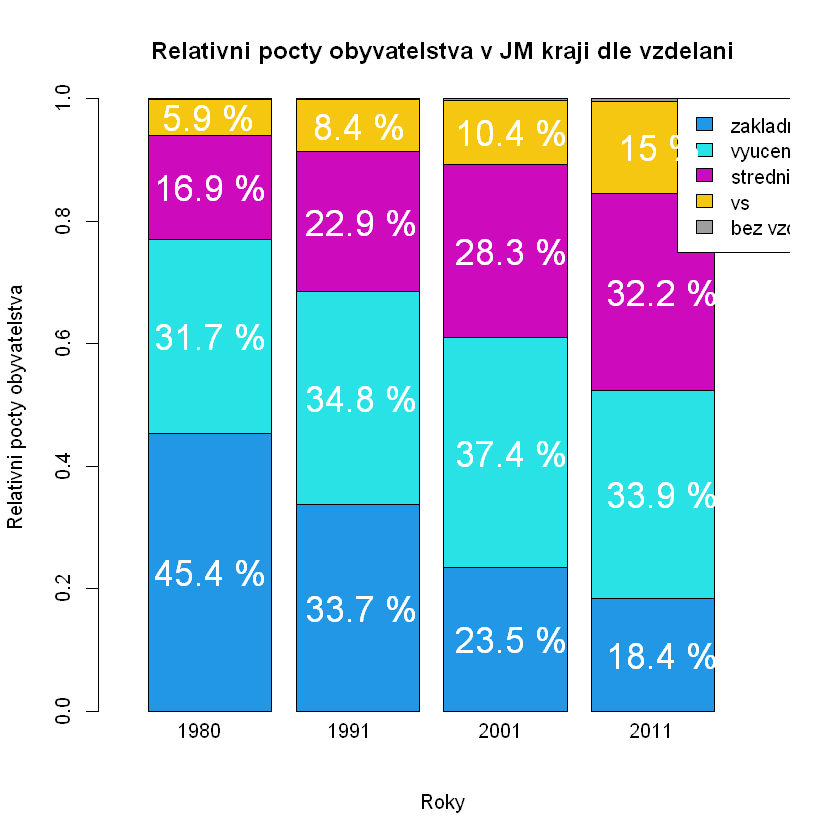

In [55]:
relativni <- M[, 2:ncol(M)]/(rowSums(M[,2:ncol(M)]) %*% t(rep(1,5)))

barplot(t(relativni) , border = TRUE , col = rep(barvy, times = 4), xlim = c(0,5.2),
        xlab = "Roky", ylab = "Relativni pocty obyvatelstva", 
        main = "Relativni pocty obyvatelstva v JM kraji dle vzdelani")

ixy <- (par("usr")[2] + par("usr")[1])/8.5
iyy <- (par("usr")[3] + par("usr")[4])/50
text(c(1,3,5,7)*ixy, par("usr")[3] - iyy, adj = 0.5, xpd = TRUE,
     labels = as.character(roky))
legend(4.5,1, c("zakladni", "vyuceni", "stredni", "vs", "bez vzdelani"), 
       fill = barvy[-6])

procenta <- round(100 * relativni[, -5], 1)

text(ixy, cumsum(relativni[1, -5])-relativni[1, -5]/2, xpd = TRUE,
     labels = paste(as.character(procenta[1, ]),"%"), col = "white", cex = 1.8, adj = 0.4)
text(3*ixy, cumsum(relativni[2, -5])-relativni[2, -5]/2, xpd = TRUE,
     labels = paste(as.character(procenta[2, ]),"%"), col = "white", cex = 1.8, adj = 0.4)
text(5*ixy, cumsum(relativni[3, -5])-relativni[3, -5]/2, xpd = TRUE,
     labels = paste(as.character(procenta[3, ]),"%"), col = "white", cex = 1.8, adj = 0.4)
text(7*ixy, cumsum(relativni[4, -5])-relativni[4, -5]/2, xpd = TRUE,
     labels = paste(as.character(procenta[4, ]),"%"), col = "white", cex = 1.8, adj = 0.4)
                

<div class="alert alert-block alert-warning"> 

Oba předchozí obrázky jsme vykreslili příkazem **bar**. Všimněte si, jak výstup tohoto příkazu závisí na parametrech.
    
</div>

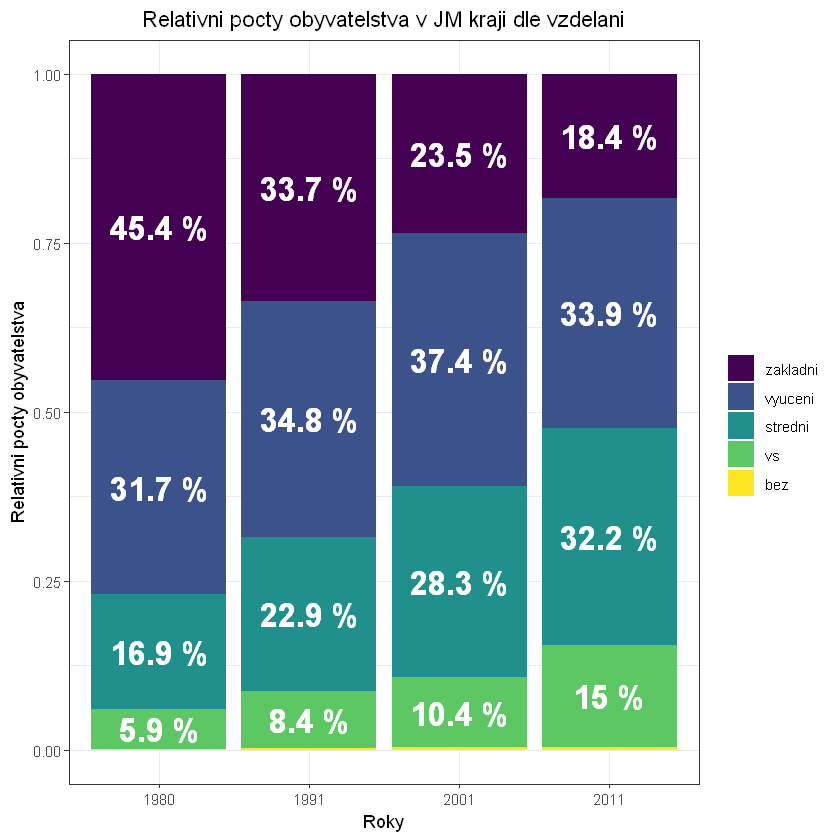

In [56]:
vzdelani <- factor(names(df)[-c(1,2)], ordered = TRUE, levels = names(df)[-c(1,2)])
dfg <- data.frame(pocet = c(t(relativni)), vzdelani = vzdelani, rok = factor(rep(roky, each = 5)))
poz <- t(apply(relativni, 1, cumsum))
dfg$pozice <- c(t(poz))
dfg$popis <- paste(round(100*dfg$pocet,1),"%")
dfg$popis[dfg$vzdelani == "bez"] <- ""

p2 <- ggplot(data = dfg, 
             aes(x = rok, y = pocet, fill = vzdelani))
p2 <- p2 + geom_bar(stat = "identity", position = "stack")
p2 <- p2 + theme_bw () + xlab("Roky") + ylab("Relativni pocty obyvatelstva") + labs(fill = "") + 
  ggtitle("Relativni pocty obyvatelstva v JM kraji dle vzdelani")
p2 <- p2 + theme(plot.title = element_text(hjust = 0.5))
# p2 <- p2 + scale_fill_brewer(palette="Dark2")  # zmena barevne palety
# p2 <- p2 + theme(legend.position = c(0.92, 0.85), legend.key.width = unit(10, "mm"))

p2 <- p2 + geom_text(aes(y = 1 - pozice + pocet/2, label = popis), vjust = 0.5, hjust = 0.5,  
                     color = "white", size = 7, fontface = "bold")
p2


<div class="alert alert-block alert-success"> 

**3.** Jak vykreslit koláč s relativními hodnotami?
    
</div>

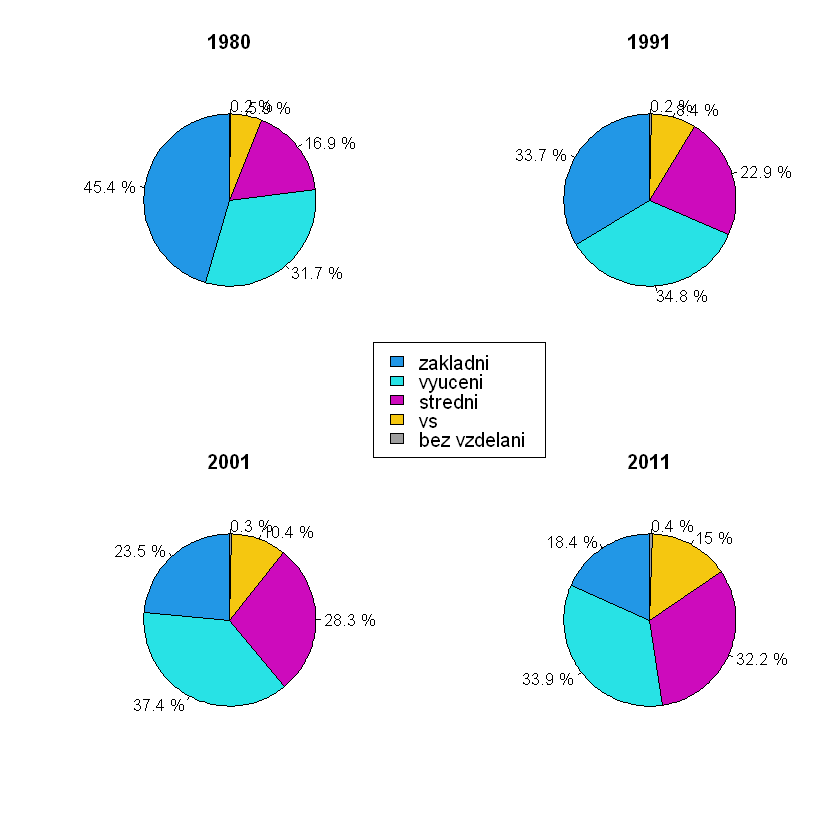

In [57]:

procenta <- round(100 * relativni, 1)
par(mfrow = c(2,2))
for (k in 1:4){
    pie(relativni[k, ], labels = paste(as.character(procenta[k, ]),"%"), col = barvy,
        main = as.character(roky[k]), init.angle = 90)
}
par(mfrow = c(1,1))
legend(x = 0, y = 0, c('zakladni', 'vyuceni', 'stredni', 'vs', 'bez vzdelani'), 
       fill = barvy, xjust = 0.5, yjust = 0.5)

<div class="alert alert-block alert-warning"> 

Při tvorbě obrázku jsme použili cyklus **for**.
    
</div>

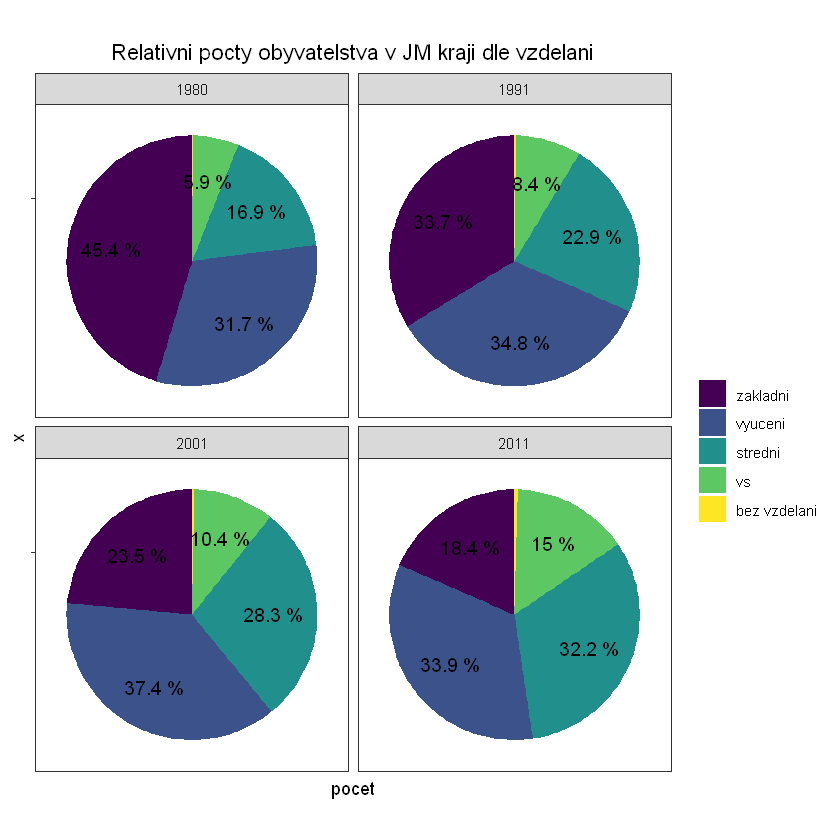

In [58]:
# ggplot
vzdelani <- factor(names(df)[-c(1,2)], ordered = TRUE, levels = names(df)[-c(1,2)])
dfg <- data.frame(pocet = c(t(relativni)), vzdelani = vzdelani, rok = rep(roky, each = 5))
poz <- apply(relativni, 1, cumsum)
dfg$pozice <- 1- c(poz) + c(t(relativni)/2)
dfg$popis <- paste(round(100*dfg$pocet,1),"%")
dfg$popis[dfg$vzdelani == "bez"] <- ""

p2 <- ggplot(data = dfg, 
             aes(x = "", y = pocet,
             fill = factor(vzdelani, 
                           labels = c('zakladni', 'vyuceni', 'stredni', 'vs', 'bez vzdelani')))) 
p2 <- p2 + geom_bar(stat = "identity", width = 2)
p2 <- p2 + coord_polar(theta = "y", start = 0)
p2 <- p2 + facet_wrap( ~ rok, ncol = 2)
p2 <- p2 + theme_bw () + labs(fill = "") + 
           ggtitle("Relativni pocty obyvatelstva v JM kraji dle vzdelani")
p2 <- p2 + theme(plot.title = element_text(hjust = 0.5))
p2 <- p2 + geom_text(aes(x = 1.3, y = pozice, label = popis), size = 4)
#p2 <- p2 + scale_fill_brewer(palette="Dark2")  # zmena barevne palety
#p2 <- p2 + theme(legend.position = c(0.92, 0.85), legend.key.width = unit(10, "mm"))
p2 <- p2 + theme(axis.text = element_blank(), 
                 panel.grid  = element_blank())
p2
